In [1]:
import tribolium_clustering as tc
import pyclesperanto_prototype as cle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, SparsePCA
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

lund_folder = tc.get_folder_path('Finsterwalde Folder')
lund = tc.processed_dataset(lund_folder)

lund_combined_thesis_props = lund.get_combined_thesis_props_no_correlation()
lund_combined_thesis_props.keys()

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Finsterwalde Gastrulation Labels (new timeframe)//


Index(['area', 'bbox_area', 'extent', 'feret_diameter_max', 'max_intensity',
       'mean_intensity', 'min_intensity', 'solidity', 'centroid-0',
       'centroid-1', 'centroid-2', 'image_stdev',
       'avg distance of 6 closest points',
       'stddev distance of 6 closest points', 'touching neighbor count',
       'aspect_ratio'],
      dtype='object')

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_thesis_props_lund = scaler.fit_transform(lund_combined_thesis_props)

pca_object = PCA()
pca_object.fit(scaled_thesis_props_lund)

explained_var_rat = pca_object.explained_variance_ratio_
cumulative_explained_variance = [np.sum(explained_var_rat[0:i+1]) 
                                 for i,nothing in enumerate(explained_var_rat)]
cumulative_explained_variance

[0.3417167864807578,
 0.5084086800780911,
 0.635314738717866,
 0.7086195166250439,
 0.7757293802441113,
 0.8339752922462295,
 0.8840045451952211,
 0.9183909258275429,
 0.9446244308190697,
 0.964245093230171,
 0.9804135415556146,
 0.9898461652260873,
 0.9952049335439784,
 0.9975707286405995,
 0.9990019742602,
 1.0]

We'll take the first7 components since they explain 90% of the variance and we'll just hope that works out. We'll do Kmeans clustering with differing numbers of clusters and plot the cluster validity indices to gain a feeling for what we maybe should expect to detect:

In [5]:
pca_transformed = pca_object.fit_transform(scaled_thesis_props_lund)[:,:7]
pca_transformed.shape

(118132, 7)

In [6]:
predictions_k2_to_8 = []

for i in range(2,9):
    clusterer = KMeans(n_clusters= i ,max_iter=3000, init= 'k-means++', random_state= 42)
    prediction = clusterer.fit_predict(pca_transformed)
    predictions_k2_to_8.append(prediction)
    
predictions_k2_to_8

[array([0, 0, 0, ..., 0, 0, 0]),
 array([2, 2, 2, ..., 2, 2, 2]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([2, 3, 3, ..., 2, 2, 2]),
 array([0, 2, 2, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 3, 3, 3]),
 array([4, 4, 7, ..., 5, 5, 5])]

In [7]:
ch_scores_pca = [calinski_harabasz_score(pca_transformed,pred) for pred in predictions_k2_to_8]

In [8]:
ASW_scores_pca = [silhouette_score(pca_transformed,pred) for pred in predictions_k2_to_8]

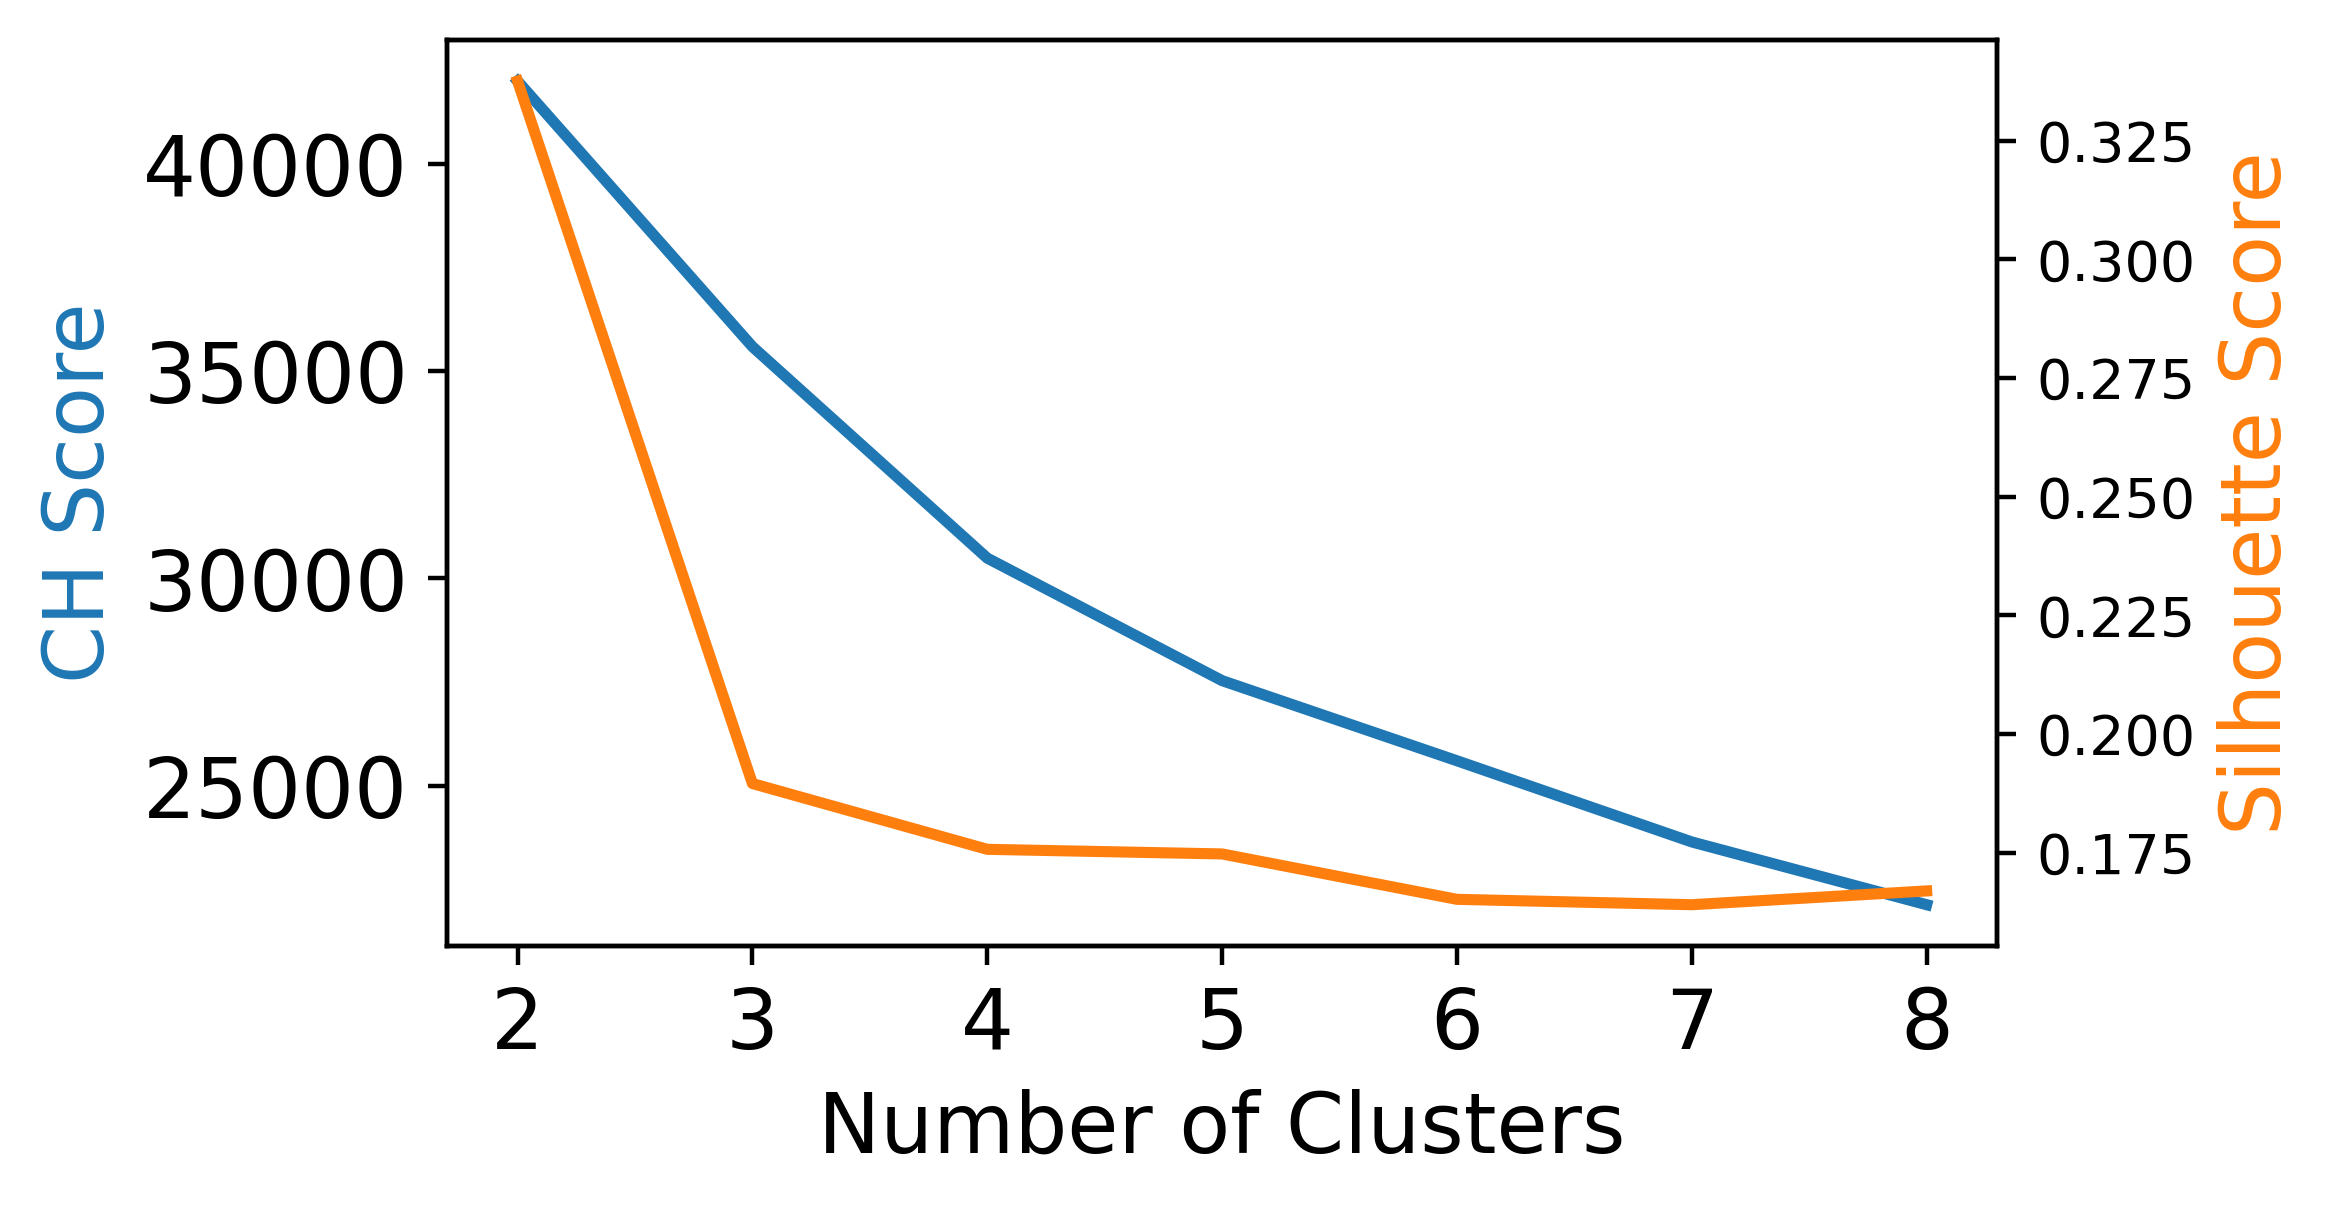

In [9]:
ASW_scores_pca = ASW_scores

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
from matplotlib import cm
x = np.array(range(6))
cmap_list = cm.get_cmap(plt.get_cmap('tab20'))(x)[np.newaxis, :, :3][0]

lw = 2
big_fs = 15
small_fs = 15
a = 1

fig, ax1 = plt.subplots(1,1,figsize = (5,3))

ax1.plot(range(2,9),ch_scores_pca,
         linewidth=lw,alpha =a,
         color = cmap_list[0])


ax1.set_xlabel('Number of Clusters', fontsize =big_fs)
ax1.set_ylabel('CH Score',fontsize= big_fs,color = cmap_list[0])
plt.xticks(fontsize=small_fs)
plt.yticks(fontsize=small_fs)

# twin object for two different y-axis on the sample plot
ax2=ax1.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(range(2,9), ASW_scores_pca,
         linewidth=lw,alpha =a,
         color = cmap_list[2])
ax2.set_ylabel('Silhouette Score',fontsize= big_fs,color = cmap_list[2])
plt.show()

In [14]:
spca_obj = SparsePCA(n_components=7)
spca_obj.fit(scaled_thesis_props_lund)
spca_transformed = spca_obj.transform(scaled_thesis_props_lund)
spca_transformed.shape

(118132, 7)

In [15]:
spca_predictions_k2_to_8 = []

for i in range(2,9):
    clusterer = KMeans(n_clusters= i ,max_iter=3000, init= 'k-means++', random_state= 42)
    prediction = clusterer.fit_predict(spca_transformed)
    spca_predictions_k2_to_8.append(prediction)
    
spca_predictions_k2_to_8

[array([1, 1, 0, ..., 1, 1, 1]),
 array([1, 1, 2, ..., 1, 1, 2]),
 array([1, 1, 3, ..., 1, 1, 2]),
 array([0, 0, 4, ..., 0, 0, 1]),
 array([3, 3, 1, ..., 0, 0, 0]),
 array([2, 2, 5, ..., 4, 4, 4]),
 array([3, 3, 6, ..., 7, 7, 7])]

In [16]:
ch_scores_spca = [calinski_harabasz_score(spca_transformed,pred) for pred in spca_predictions_k2_to_8]

In [17]:
ASW_scores_spca = [silhouette_score(spca_transformed,pred) for pred in spca_predictions_k2_to_8]

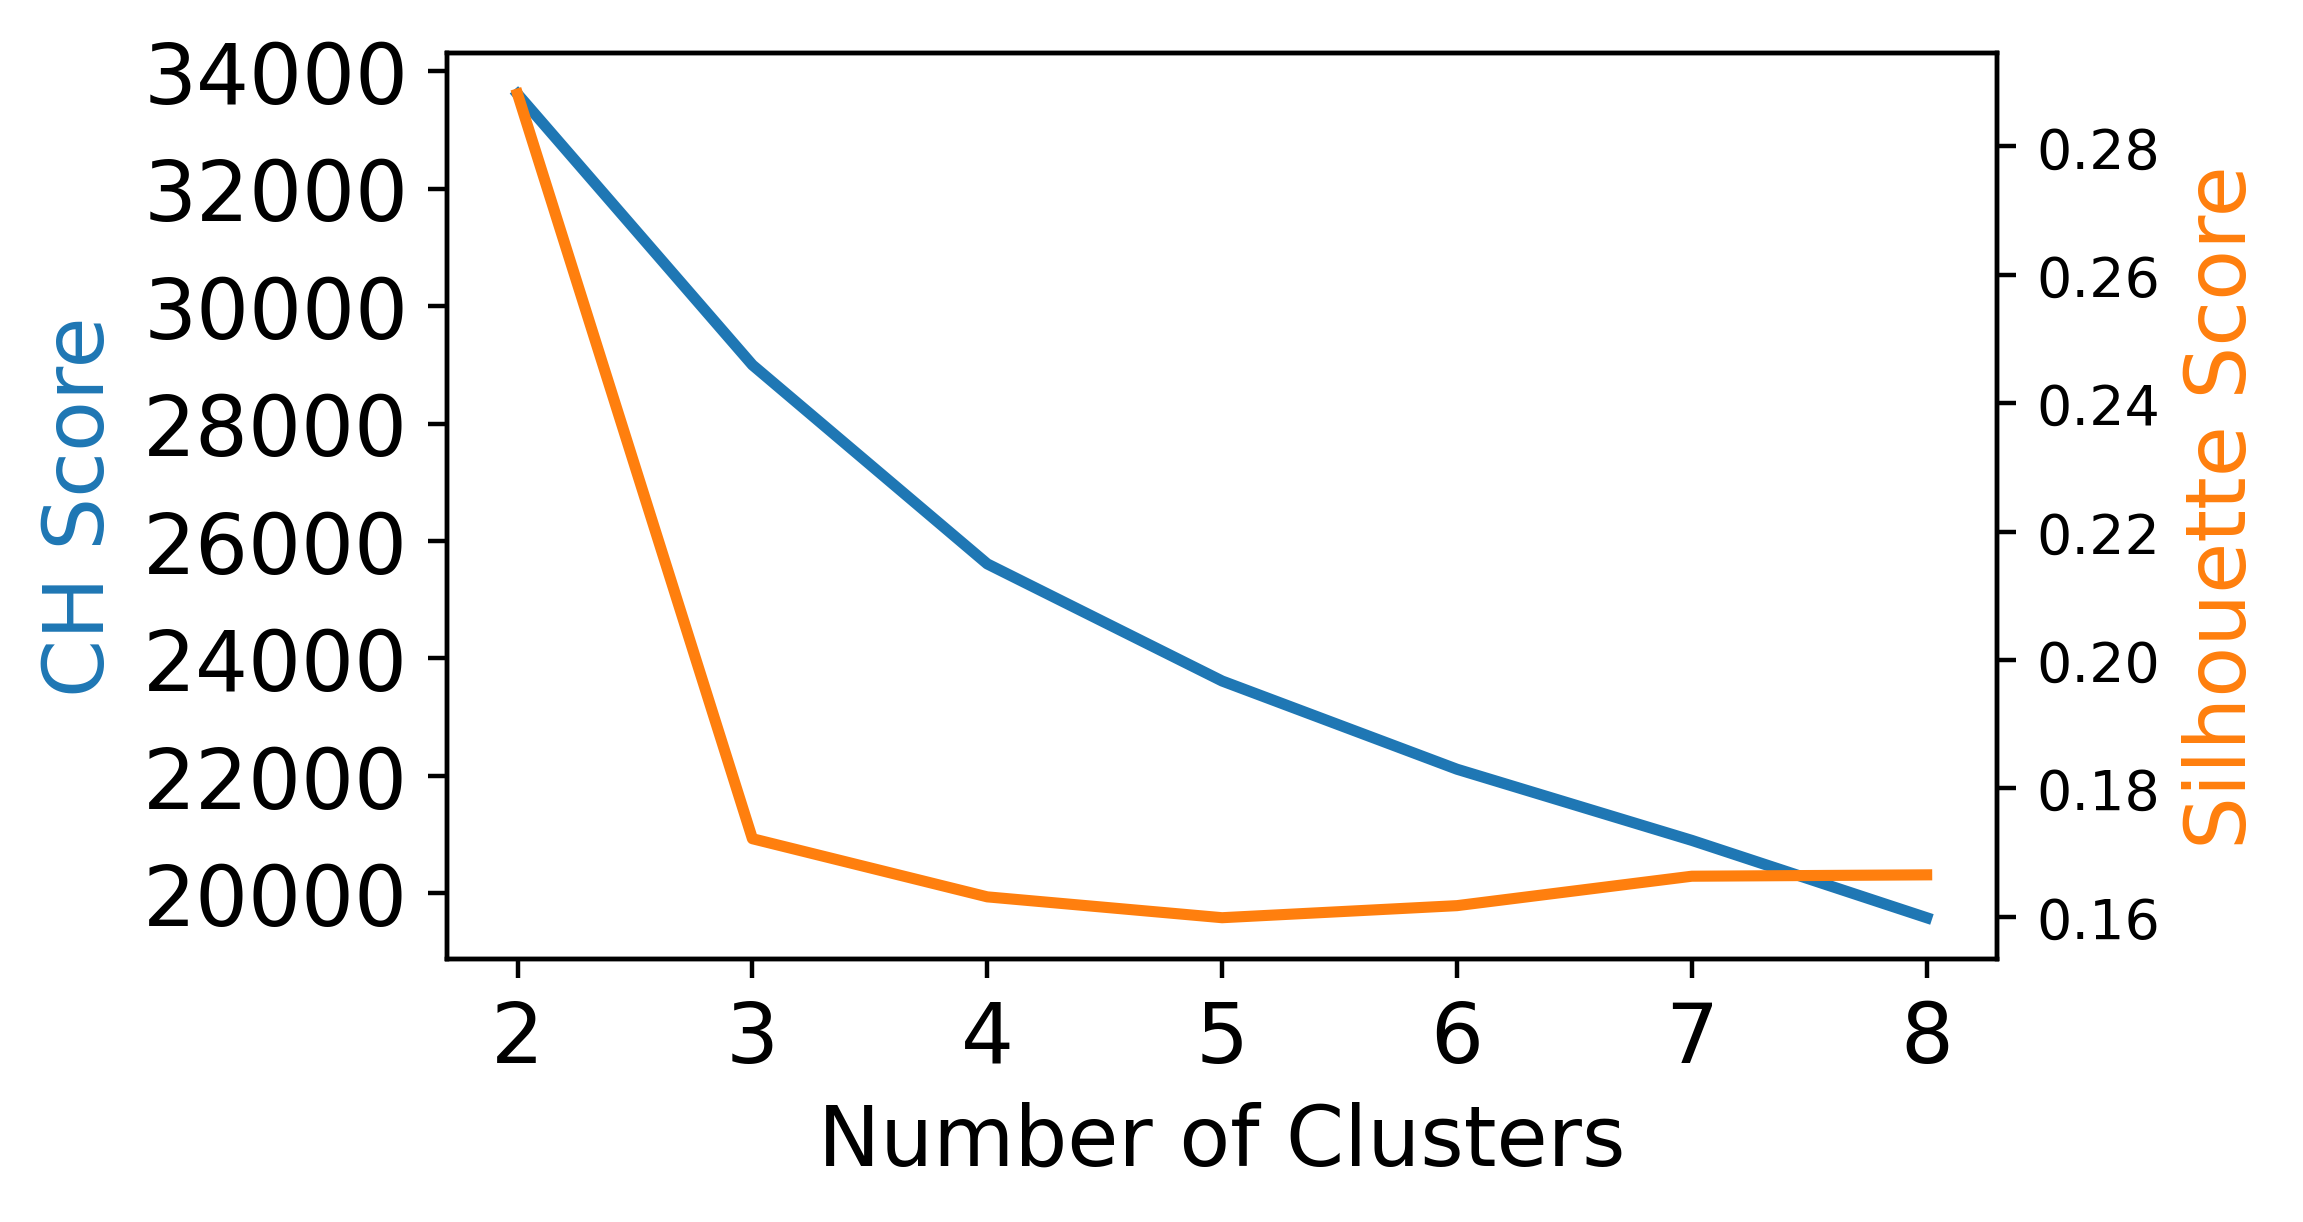

In [18]:
lw = 2
big_fs = 15
small_fs = 15
a = 1

fig, ax1 = plt.subplots(1,1,figsize = (5,3))

ax1.plot(range(2,9),ch_scores_spca,
         linewidth=lw,alpha =a,
         color = cmap_list[0])


ax1.set_xlabel('Number of Clusters', fontsize =big_fs)
ax1.set_ylabel('CH Score',fontsize= big_fs,color = cmap_list[0])
plt.xticks(fontsize=small_fs)
plt.yticks(fontsize=small_fs)

# twin object for two different y-axis on the sample plot
ax2=ax1.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(range(2,9), ASW_scores_spca,
         linewidth=lw,alpha =a,
         color = cmap_list[2])
ax2.set_ylabel('Silhouette Score',fontsize= big_fs,color = cmap_list[2])
plt.show()

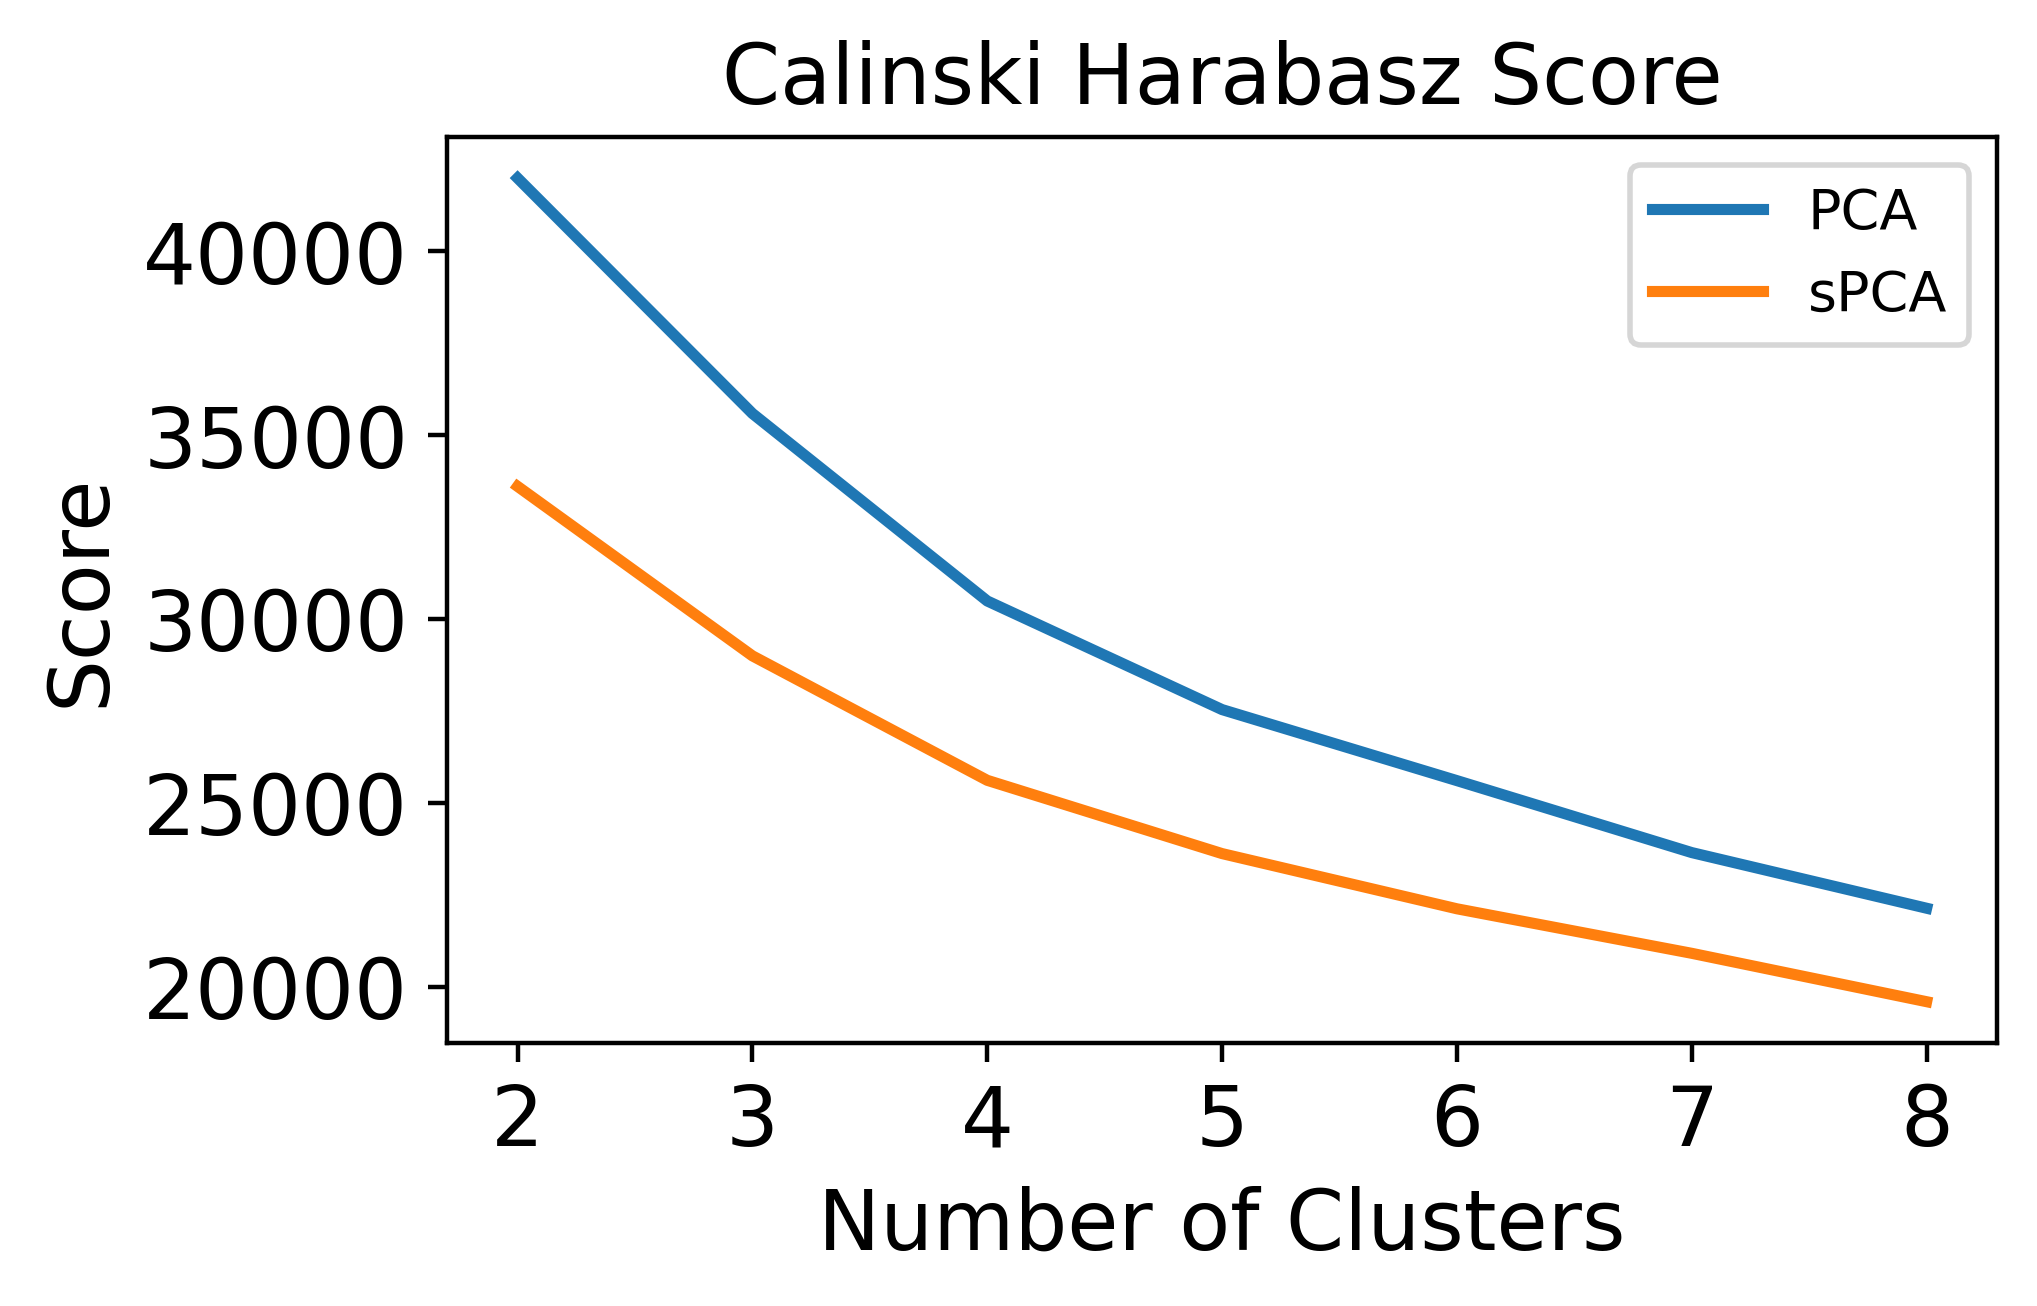

In [19]:
fig, ax1 = plt.subplots(1,1,figsize = (5,3))

ax1.plot(range(2,9),ch_scores_pca,
         linewidth=lw,alpha =a,
         label = 'PCA')
ax1.plot(range(2,9),ch_scores_spca,
         linewidth=lw,alpha =a,
         label = 'sPCA')


ax1.set_xlabel('Number of Clusters', fontsize =big_fs)
ax1.set_ylabel('Score',fontsize= big_fs)
ax1.set_title('Calinski Harabasz Score', fontsize = big_fs)
plt.xticks(fontsize=small_fs)
plt.yticks(fontsize=small_fs)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)

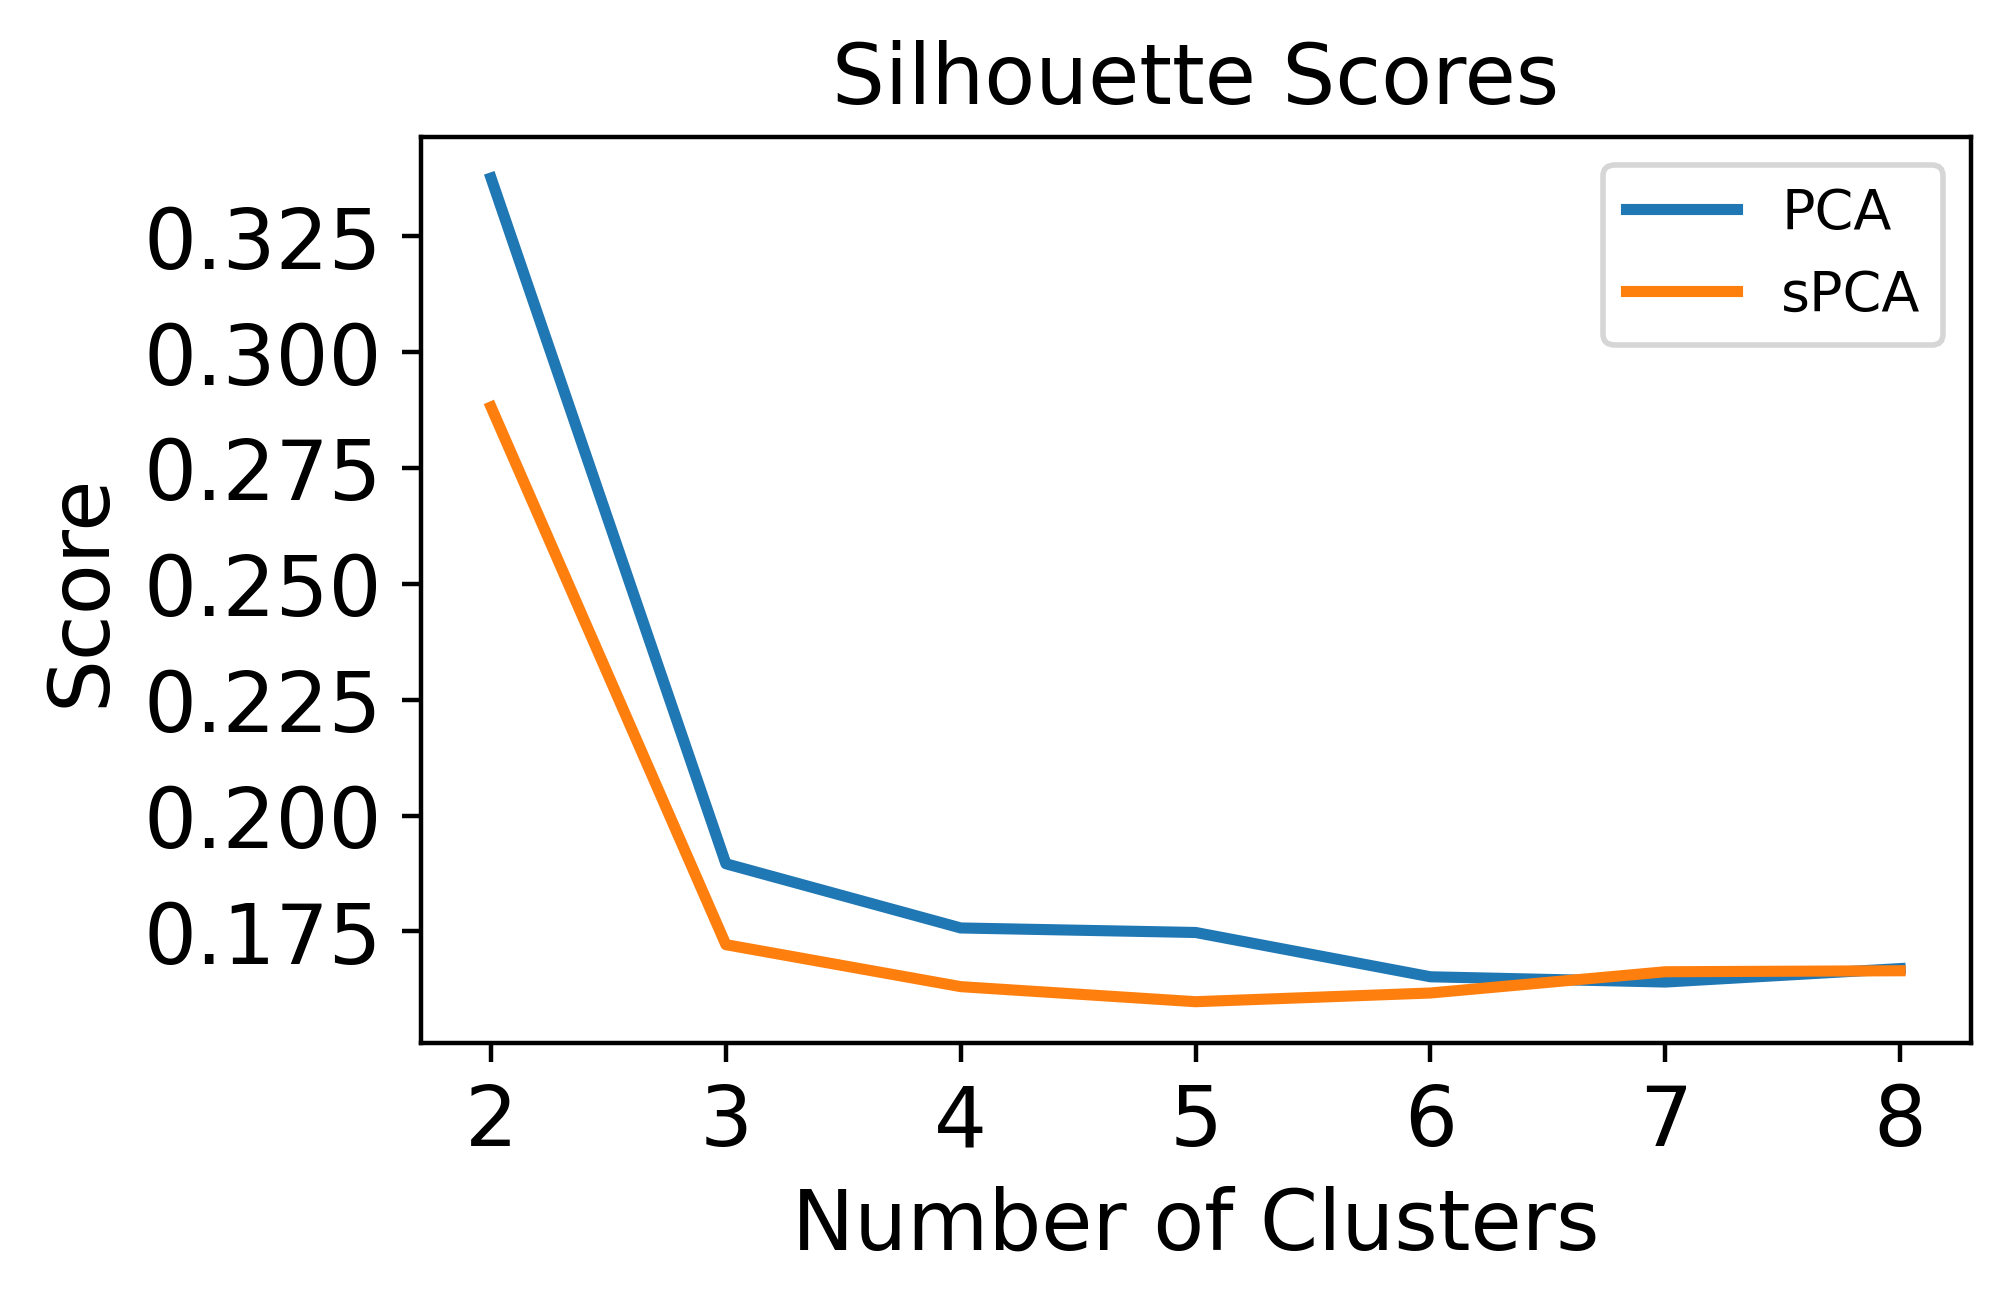

In [20]:
fig, ax1 = plt.subplots(1,1,figsize = (5,3))

ax1.plot(range(2,9),ASW_scores,
         linewidth=lw,alpha =a,
         label = 'PCA')
ax1.plot(range(2,9),ASW_scores_spca,
         linewidth=lw,alpha =a,
         label = 'sPCA')


ax1.set_xlabel('Number of Clusters', fontsize =big_fs)
ax1.set_ylabel('Score',fontsize= big_fs)
ax1.set_title('Silhouette Scores', fontsize = big_fs)
plt.xticks(fontsize=small_fs)
plt.yticks(fontsize=small_fs)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)

# PCA results
## 5 Clusters

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Finsterwalde Gastrulation Labels (new timeframe)//


C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\pyopencl\__init__.py:267: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\_qt\__init__.py:54: UserWarning: 

napari was tested with QT library `>=5.12.3`.
The version installed is 5.9.7. Please report any issues with
this specific QT version at https://github.com/Napari/napari/issues.
  warn(message=warn_message)
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully su

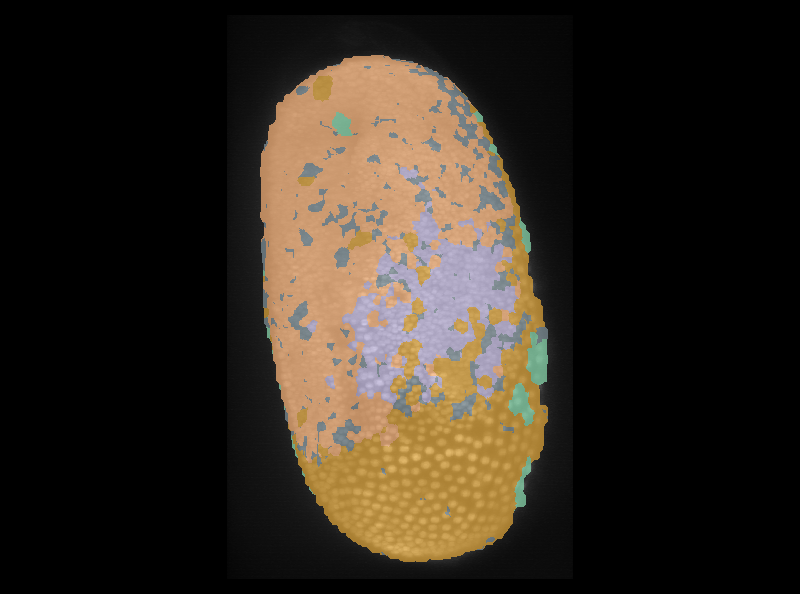

In [10]:
def gen_cluster_image_and_orig_image_from_dataset(dataset,timepoint,prediction, all_timepoint_predictionlist = True):
    from tribolium_clustering.data_visualisation import generate_parametric_cluster_image
    from pyclesperanto_prototype import push
    
    labels      = dataset.get_labels(timepoint)
    orig_image  = dataset.get_intensity_image(timepoint)
    cum_indices = dataset.cumulative_label_lengths()
    
    
    if all_timepoint_predictionlist:
        timepoint_pred = prediction[cum_indices[timepoint]:cum_indices[timepoint+1]]
    else:
        timepoint_pred = prediction
    
    cluster_image = generate_parametric_cluster_image(labels, push(labels), timepoint_pred)
    
    return cluster_image, orig_image

np_cmap = tc.napari_label_cmap()
rot_lund = (0,150,0)
import napari

pca_img_5cl_t0, original_img_t0 = gen_cluster_image_and_orig_image_from_dataset(lund,0,predictions_k2_to_8[3])

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img_t0, rotate=rot_lund)
viewer.add_labels(pca_img_5cl_t0,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Finsterwalde Gastrulation Labels (new timeframe)//


C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed wit

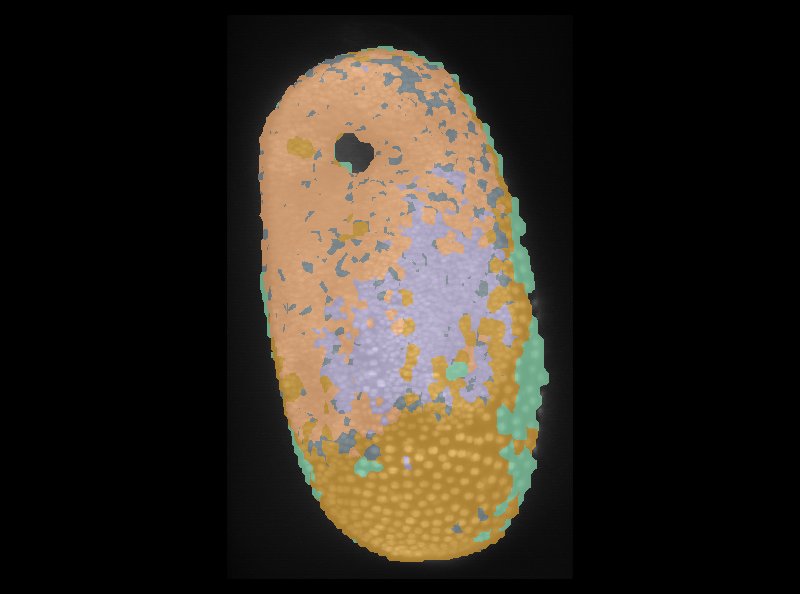

In [11]:
pca_img_5cl_t6, original_img_t6 = gen_cluster_image_and_orig_image_from_dataset(lund,6,predictions_k2_to_8[3])

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img_t6, rotate=rot_lund)
viewer.add_labels(pca_img_5cl_t6,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Finsterwalde Gastrulation Labels (new timeframe)//


C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed wit

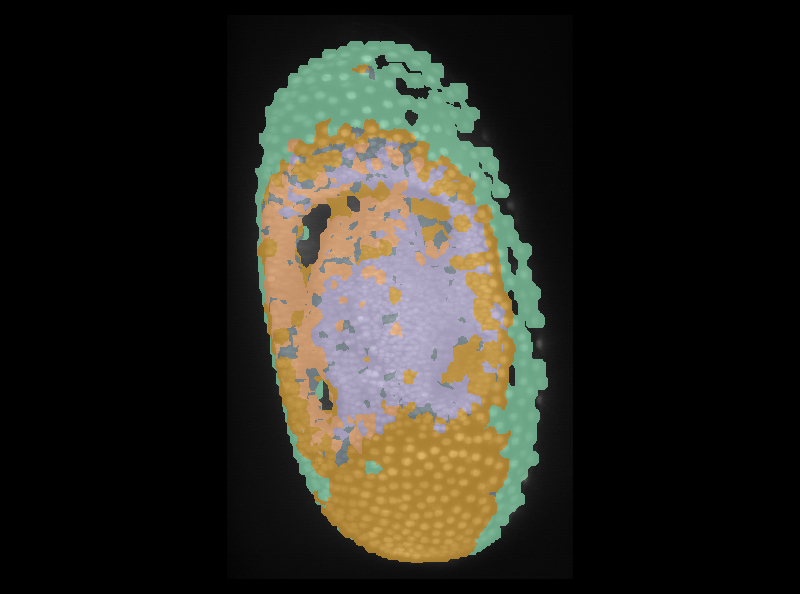

In [12]:
pca_img_5cl_t12, original_img_t12 = gen_cluster_image_and_orig_image_from_dataset(lund,12,predictions_k2_to_8[3])

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img_t12, rotate=rot_lund)
viewer.add_labels(pca_img_5cl_t12,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Finsterwalde Gastrulation Labels (new timeframe)//


C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed wit

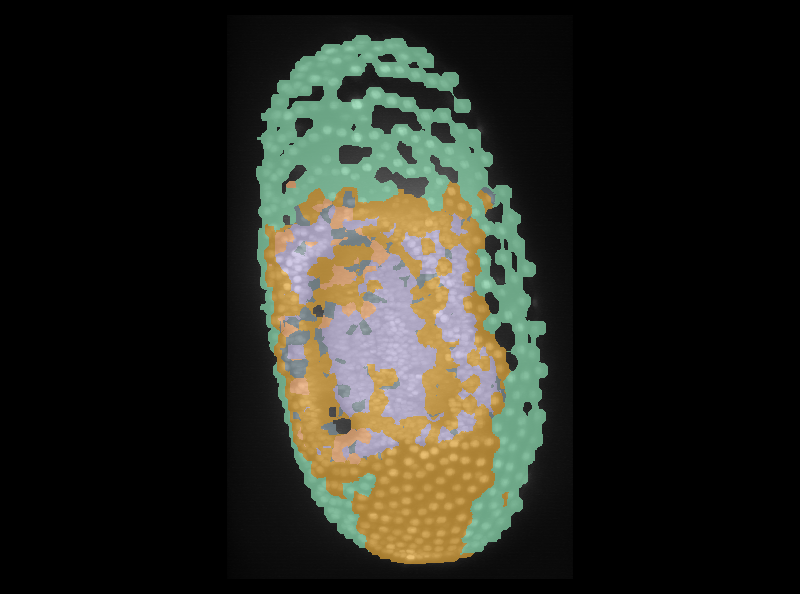

In [13]:
pca_img_5cl_t24, original_img_t24 = gen_cluster_image_and_orig_image_from_dataset(lund,24,predictions_k2_to_8[3])

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img_t24, rotate=rot_lund)
viewer.add_labels(pca_img_5cl_t24,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)

# SPCA
## 5 Clusters

Are PCA and sPCA similar? Let's find out with adjusted rand score and V-measure!

In [24]:
from sklearn.metrics import adjusted_rand_score, v_measure_score

v_measures  = [v_measure_score(pca_pred,spca_pred) for pca_pred,spca_pred in zip(predictions_k2_to_8,spca_predictions_k2_to_8)]
rand_scores = [adjusted_rand_score(pca_pred,spca_pred) for pca_pred,spca_pred in zip(predictions_k2_to_8,spca_predictions_k2_to_8)]

C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\sklearn\metrics\cluster\_supervised.py:389: RuntimeWarning: overflow encountered in longlong_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\sklearn\metrics\cluster\_supervised.py:390: RuntimeWarning: overflow encountered in longlong_scalars
  (tp + fp) * (fp + tn))
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\sklearn\metrics\cluster\_supervised.py:389: RuntimeWarning: overflow encountered in longlong_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\sklearn\metrics\cluster\_supervised.py:390: RuntimeWarning: overflow encountered in longlong_scalars
  (tp + fp) * (fp + tn))
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\sklearn\metrics\cluster\_supervised.py:389: RuntimeWarning: overflow encountered in longlong_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + 

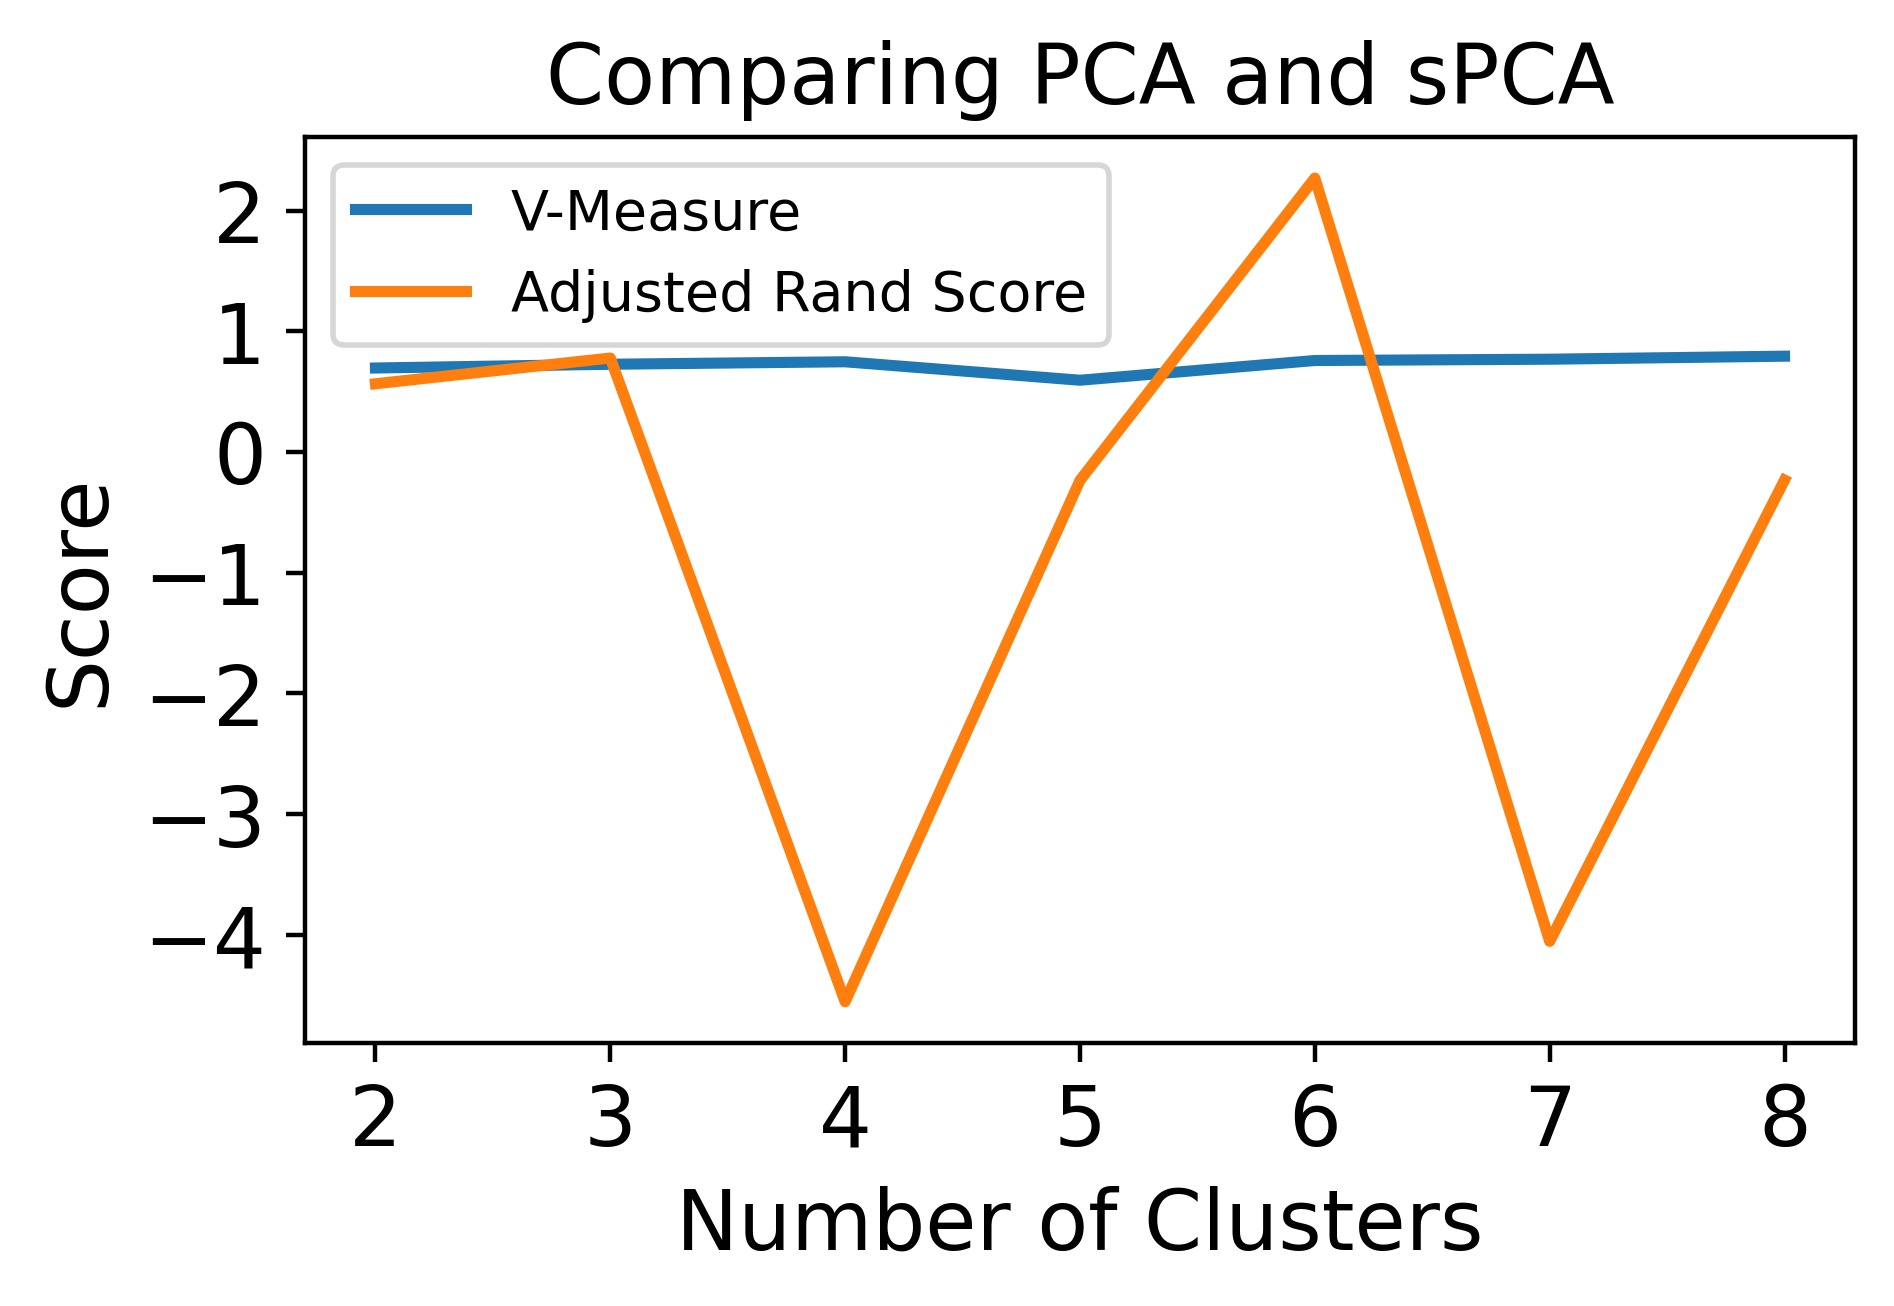

In [25]:
fig, ax1 = plt.subplots(1,1,figsize = (5,3))

ax1.plot(range(2,9),v_measures,
         linewidth=lw,alpha =a,
         label = 'V-Measure')
ax1.plot(range(2,9),rand_scores,
         linewidth=lw,alpha =a,
         label = 'Adjusted Rand Score')


ax1.set_xlabel('Number of Clusters', fontsize =big_fs)
ax1.set_ylabel('Score',fontsize= big_fs)
ax1.set_title('Comparing PCA and sPCA', fontsize = big_fs)
plt.xticks(fontsize=small_fs)
plt.yticks(fontsize=small_fs)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Finsterwalde Gastrulation Labels (new timeframe)//


C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed wit

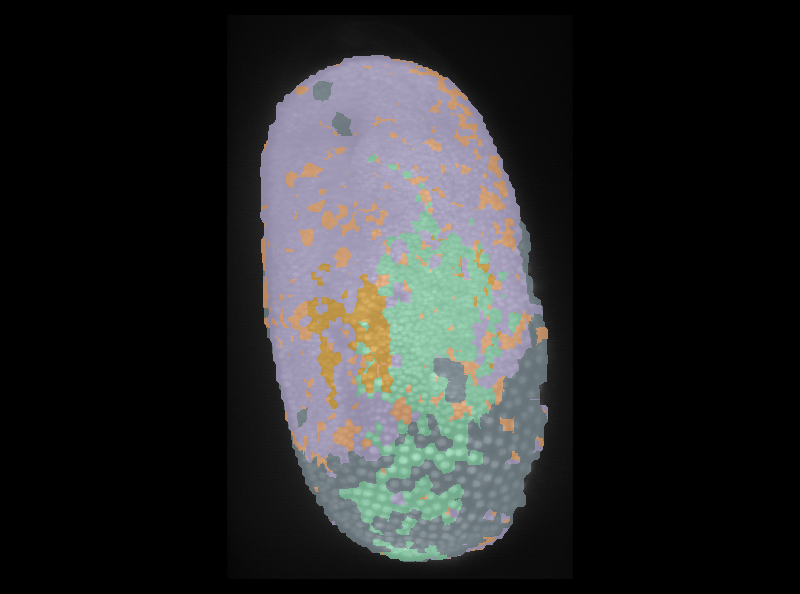

In [26]:
spca_img_5cl_t0, original_img_t0 = gen_cluster_image_and_orig_image_from_dataset(lund,0,
                                                                                 spca_predictions_k2_to_8[3])

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img_t0, rotate=rot_lund)
viewer.add_labels(spca_img_5cl_t0,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Finsterwalde Gastrulation Labels (new timeframe)//


C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed wit

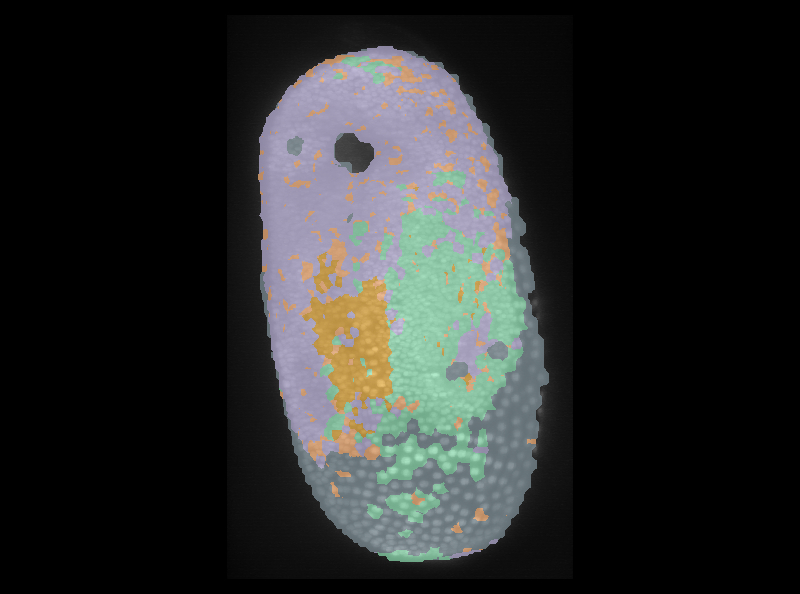

In [27]:
spca_img_5cl_t6, original_img_t6 = gen_cluster_image_and_orig_image_from_dataset(lund,6,
                                                                                 spca_predictions_k2_to_8[3])

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img_t6, rotate=rot_lund)
viewer.add_labels(spca_img_5cl_t6,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Finsterwalde Gastrulation Labels (new timeframe)//


C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed wit

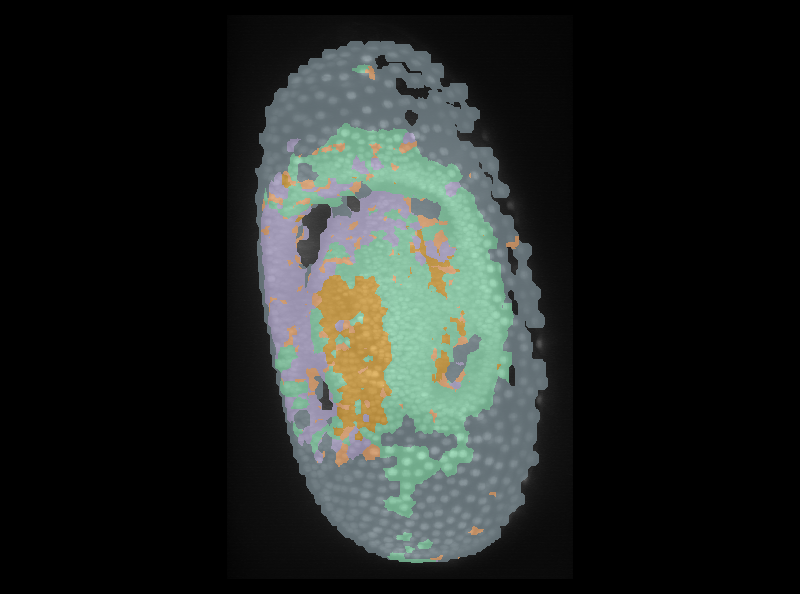

In [28]:
spca_img_5cl_t12, original_img_t12 = gen_cluster_image_and_orig_image_from_dataset(lund,12,
                                                                                 spca_predictions_k2_to_8[3])

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img_t12, rotate=rot_lund)
viewer.add_labels(spca_img_5cl_t12,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Finsterwalde Gastrulation Labels (new timeframe)//


C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed without applying an out-of-slice rotation or shear component.
  warnings.warn(
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\napari\layers\base\base.py:629: UserWarning: Non-orthogonal slicing is being requested, but is not fully supported. Data is displayed wit

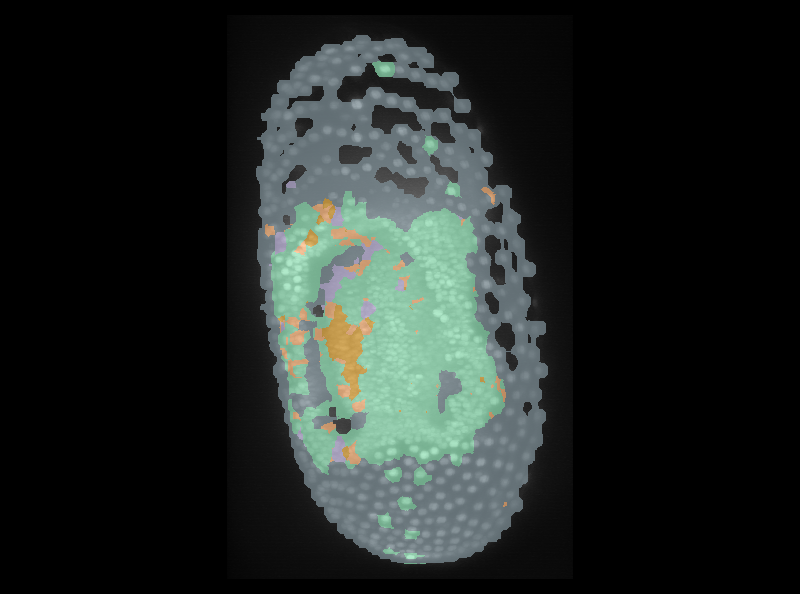

In [29]:
spca_img_5cl_t24, original_img_t24 = gen_cluster_image_and_orig_image_from_dataset(lund,24,
                                                                                 spca_predictions_k2_to_8[3])

viewer = napari.Viewer(ndisplay=3)
viewer.add_image(original_img_t24, rotate=rot_lund)
viewer.add_labels(spca_img_5cl_t24,rotate=rot_lund,color = np_cmap)

napari.utils.nbscreenshot(viewer,canvas_only=True)